Wine Quality Prediction with Data Cleaning

In [31]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [32]:
# Step 2: Load dataset
df = pd.read_csv('WineQT.csv')  # Replace with your actual path if needed


In [33]:
# Step 3: Initial inspection
print(df.head())
print(df.info())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Data Cleaning

In [34]:
# Drop 'Id' column if not useful
df.drop('Id', axis=1, inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values (or use imputation if needed)
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Correlation Analysis

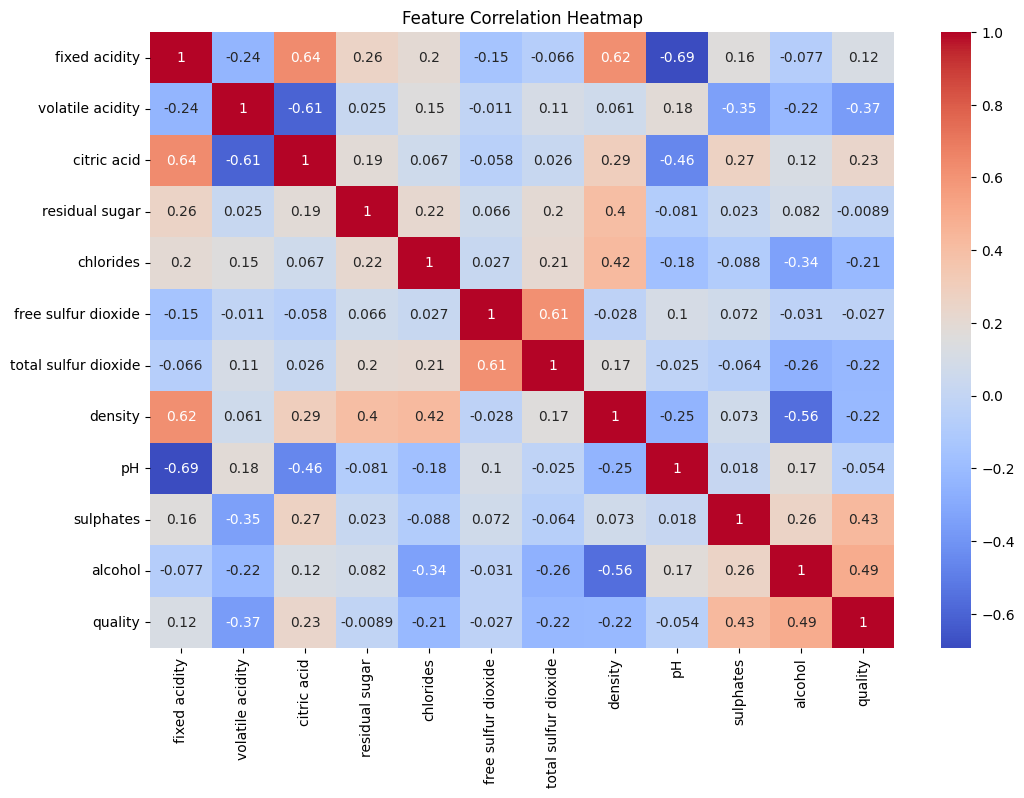

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



Model Preparation

In [36]:
# Split features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train and Evaluate Models

In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, rf_preds))


Random Forest Results:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.65      0.71      0.68        66
           6       0.54      0.60      0.57        62
           7       0.67      0.33      0.44        18

    accuracy                           0.60       149
   macro avg       0.47      0.41      0.42       149
weighted avg       0.60      0.60      0.59       149



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SGD Classifier

In [38]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)
sgd_preds = sgd.predict(X_test_scaled)
print("SGD Classifier Results:")
print(classification_report(y_test, sgd_preds))


SGD Classifier Results:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.65      0.50      0.56        66
           6       0.51      0.58      0.55        62
           7       0.53      0.44      0.48        18

    accuracy                           0.52       149
   macro avg       0.42      0.38      0.40       149
weighted avg       0.57      0.52      0.54       149



Support Vector Classifier

In [39]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)
print("SVC Results:")
print(classification_report(y_test, svc_preds))


SVC Results:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.71      0.67      0.69        66
           6       0.56      0.73      0.63        62
           7       1.00      0.39      0.56        18

    accuracy                           0.64       149
   macro avg       0.57      0.45      0.47       149
weighted avg       0.67      0.64      0.64       149



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix Visualization

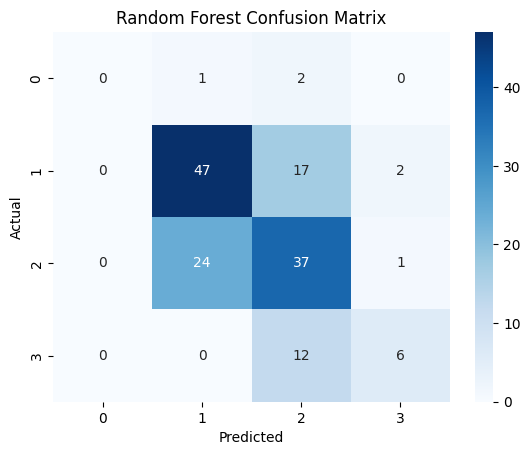

In [40]:
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
